In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



k=3.9e6          # a constant with units of Gpc^{-3} yr^{-3/37}
t_0=13.78e9      # in units of years
t=13.38e9        # in units of years , let t=t_0 (i.e. calcluatiing the merger rate today)

f_pbh=4.3e-3
f=0.85*f_pbh               #f_pbh=f/0.85 ie. f=0.85*f_pbh
σ_eq=0.005
α=1.6
M=5                        #in units of M☉
   
    
    

def P(m):               #Powerlaw PBH mass distribution
    return (((α-1)/M)*((m/M)**(-α)))

def minimum(a, b):
    if np.any(a <= b):
        return a
    else:
        return b     


def R_12(m_1,m_2):
    return (k*((t/t_0)**(-34/37))*(f**2)*(((f**2)+(σ_eq**2))**(-21/74))*minimum((P(m_1)/m_1),(P(m_2)/m_2))
            *((P(m_1)/m_1)+(P(m_2)/m_2))* ((m_1*m_2)**(3/37))* ((m_1+m_2)**(36/37)))


print("Merger rate, R_12=",R_12(5,5),'Gpc^-3 yr^_1')



Merger rate, R_12= 13.477021085521548 Gpc^-3 yr^_1


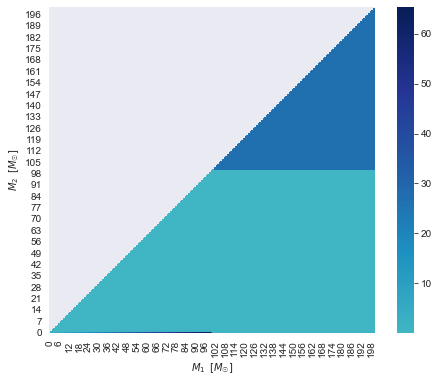

In [50]:
dm_1=10
dm_2=10


Δ=2


m_1 = np.arange(6, 1000+dm_1, dm_1)
m_2 = np.arange(6, 1000+dm_2, dm_2)

M_1, M_2 = np.meshgrid(m_1, m_2,indexing='ij')
M_1_list=M_1.tolist()
M_2_list=M_2.tolist()


M_list=M_1_list+M_2_list

M_arr= np.asarray(M_list)



x_list=np.zeros(len(M_arr)-1)
y_list=np.zeros(len(M_arr)-1)

for i in range(len(M_arr)-1):          #calculation of x_c and y_c.
    x=(M_arr[i,0]+M_arr[i+1,0])/2
    y=(M_arr[i,1]+M_arr[i+1,1])/2
    x_list[i]=x  #x_c
    y_list[i]=y  #y_c
    i=+1

y_arr=np.asarray(y_list)
x_arr=np.asarray(x_list)
X,Y=np.meshgrid(x_arr, y_arr,indexing='ij')  #grid of x_c and y_c.


plt.figure(figsize=(8,6))

Merger_12=(R_12(X,Y)*(Δ**2))

# Can be great to plot only a half matrix
mask = np.zeros_like(Merger_12)  #created an array of shape Merger_12 with all the elements in it being 0.
mask[np.tril_indices_from(mask)] = True   # Generate a mask for the lower triangle.

with sns.axes_style("darkgrid"):
    ax = sns.heatmap(Merger_12, mask=mask, square=True,  cmap="YlGnBu", cbar=True, center=0)
    ax.invert_yaxis()
    plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
    plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
    plt.show()